<a href="https://colab.research.google.com/github/shuvasha/stat/blob/main/Final_Stat_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pycaret.utils import version
version()

'3.0.0'

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/shuvasha/stat/main/transfusion.csv')
df.head(25)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [31]:
df.drop_duplicates(inplace=True)

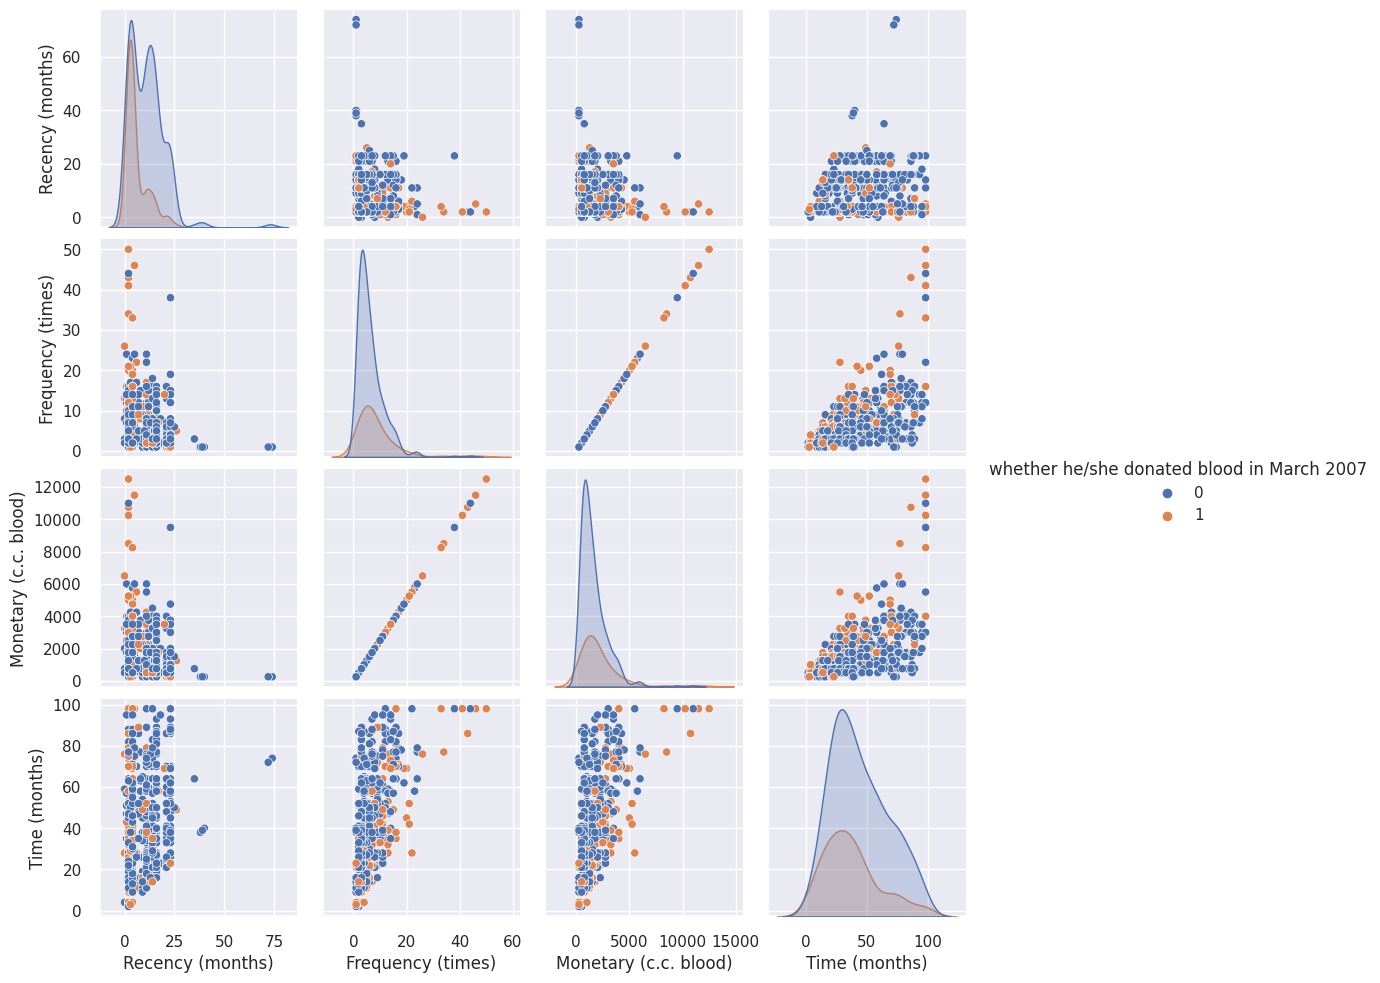

In [32]:
sns.pairplot(df, hue='whether he/she donated blood in March 2007')
plt.show()

In [33]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [34]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


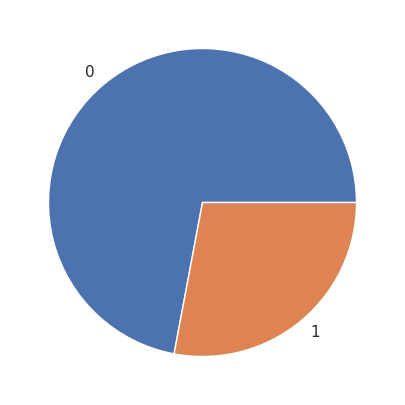

In [35]:
y =df['whether he/she donated blood in March 2007']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [36]:
X = df.drop(columns=['whether he/she donated blood in March 2007'])
X.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
5,4,4,1000,4
6,2,7,1750,14
7,1,12,3000,35
8,2,9,2250,22
9,5,46,11500,98


In [37]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency (months),533.0,9.529081,8.250860,0.0,3.0,8.0,14.0,74.0
Frequency (times),533.0,6.990619,6.265875,1.0,3.0,5.0,9.0,50.0
Monetary (c.c. blood),533.0,1747.654784,1566.468760,250.0,750.0,1250.0,2250.0,12500.0
Time (months),533.0,42.303940,23.295291,2.0,26.0,38.0,58.0,98.0


In [38]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,-0.913378,6.870514,6.870514,2.393118
1,-1.156005,0.959966,0.959966,-0.614604
2,-1.034691,1.439200,1.439200,-0.313832
3,-0.913378,2.078178,2.078178,0.115843
4,-1.034691,2.717156,2.717156,1.490801
5,-0.670751,-0.477735,-0.477735,-1.645823
6,-0.913378,0.001499,0.001499,-1.216148
7,-1.034691,0.800221,0.800221,-0.313832
8,-0.913378,0.320988,0.320988,-0.872409
9,-0.549438,6.231536,6.231536,2.393118


In [39]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Recency (months),533.0,1.066481e-16,1.000939,-1.156005,-0.792065,-0.185498,0.542382,7.821183
Frequency (times),533.0,-5.332403e-17,1.000939,-0.956969,-0.637480,-0.317991,0.320988,6.870514
Monetary (c.c. blood),533.0,-6.665504e-18,1.000939,-0.956969,-0.637480,-0.317991,0.320988,6.870514
Time (months),533.0,0.000000e+00,1.000939,-1.731758,-0.700539,-0.184929,0.674420,2.393118


In [40]:
observations = list(df.index)
variables = list(df.columns)

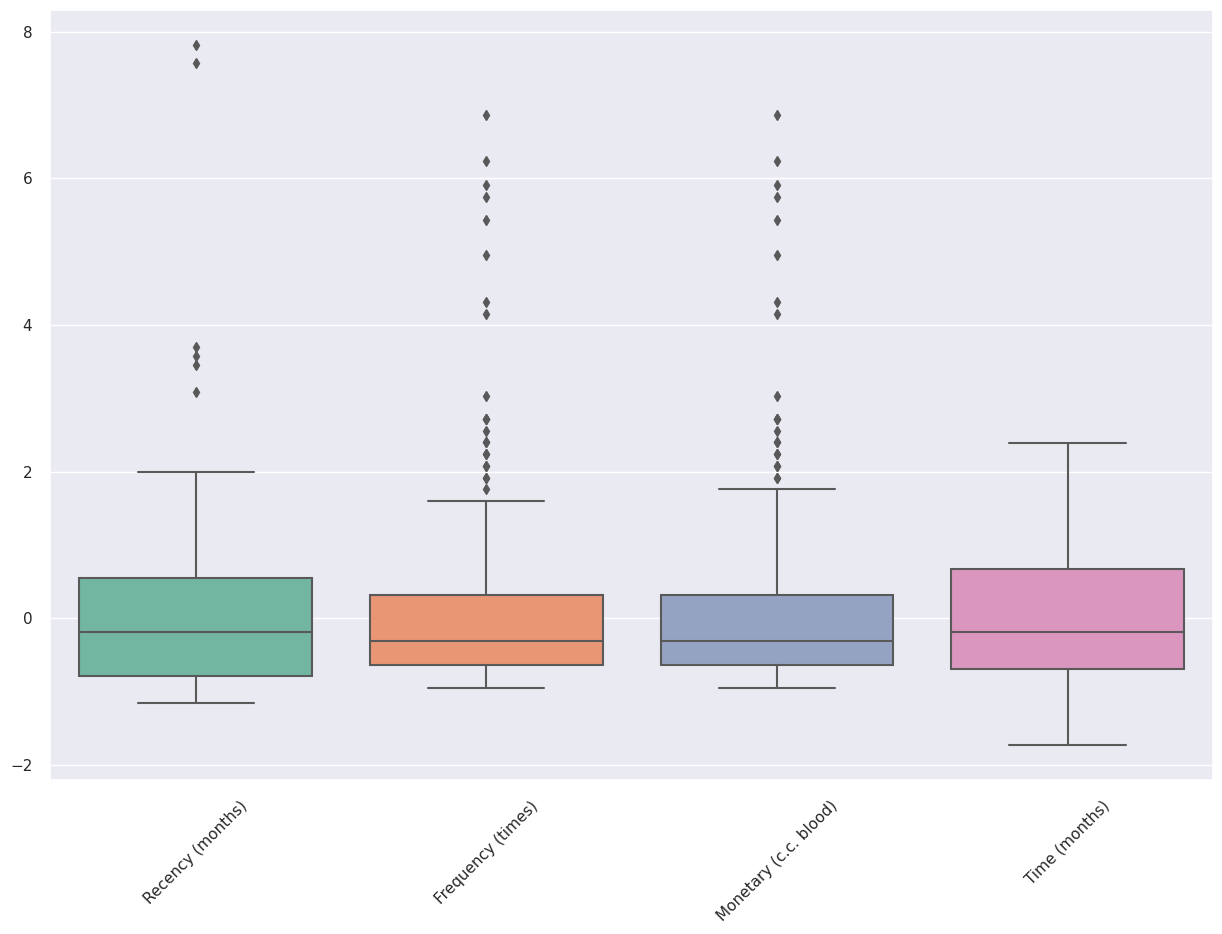

In [41]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

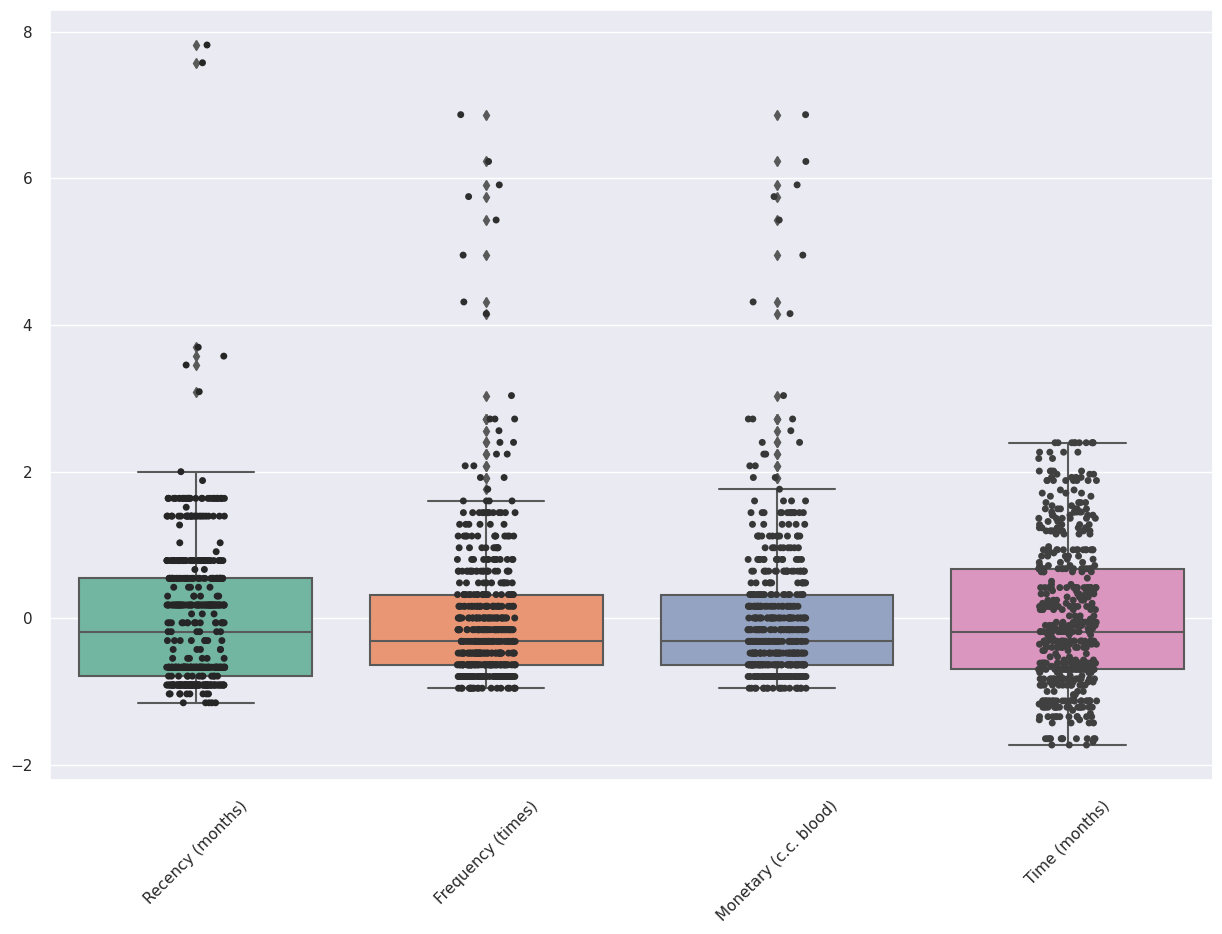

In [42]:
ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

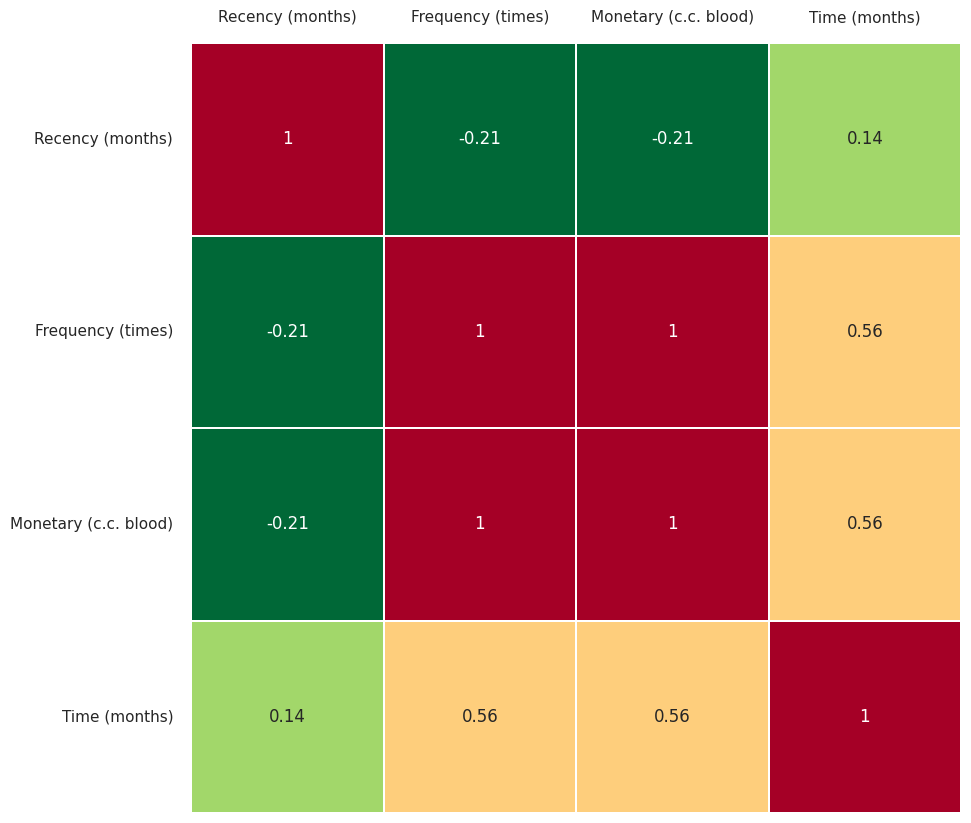

In [43]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Text(0, 0.5, 'Z2')

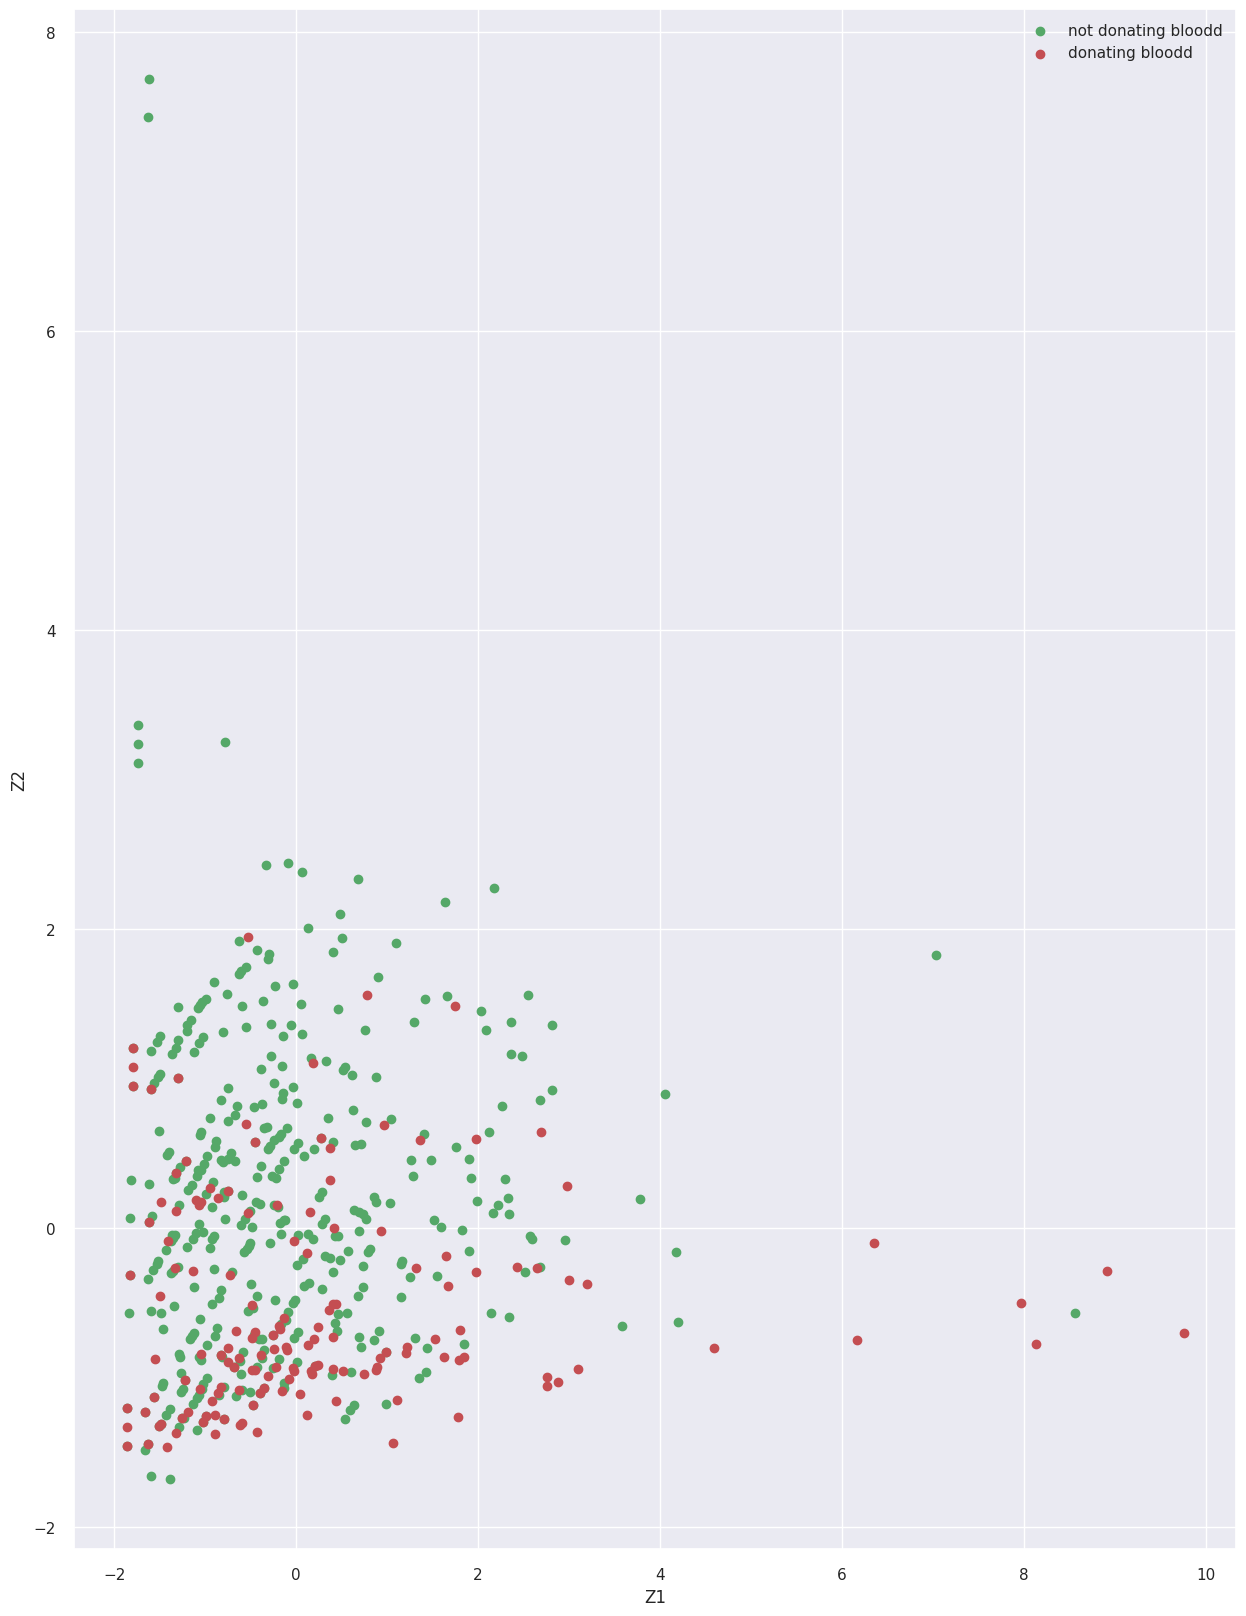

In [45]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Male= np.where(y == 0)
idx_Female = np.where(y == 1)


plt. figure(figsize=(15,20))
plt.scatter(Z[idx_Male,0], Z[idx_Male,1], c='g', label='not donating blood')
plt.scatter(Z[idx_Female,0], Z[idx_Female,1], c='r', label='donating blood')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

array([[-1.35454753e-01,  8.86366624e-01,  4.42725895e-01,
         0.00000000e+00],
       [ 6.20588577e-01, -7.07222978e-02,  3.31463685e-01,
         7.07106781e-01],
       [ 6.20588577e-01, -7.07222978e-02,  3.31463685e-01,
        -7.07106781e-01],
       [ 4.59773472e-01,  4.52051901e-01, -7.64367342e-01,
        -2.77555756e-17]])

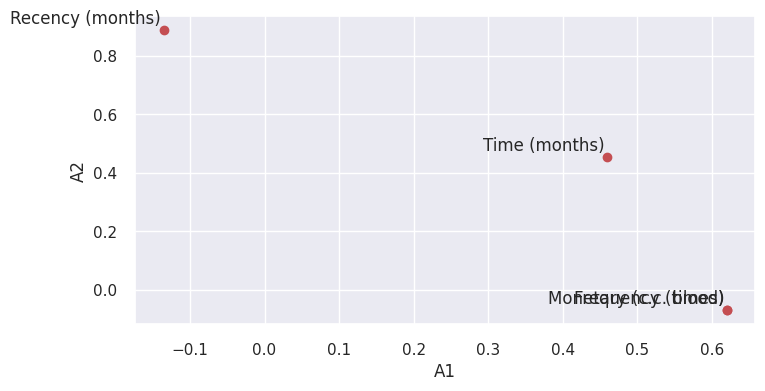

In [46]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

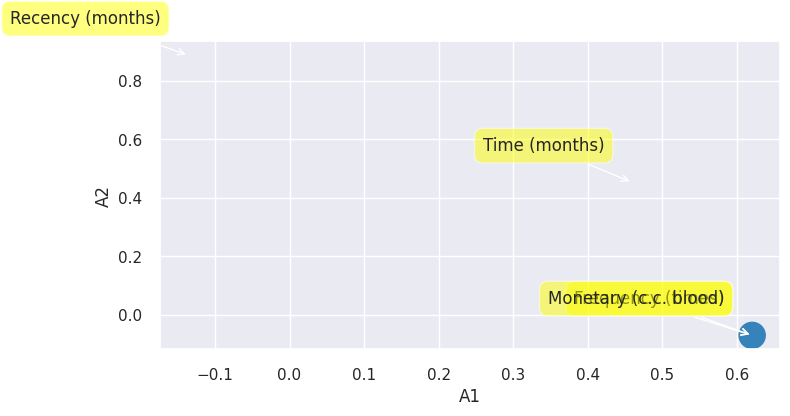

In [47]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

array([2.46265212e+00, 1.10896815e+00, 4.35898520e-01, 1.48012434e-31])

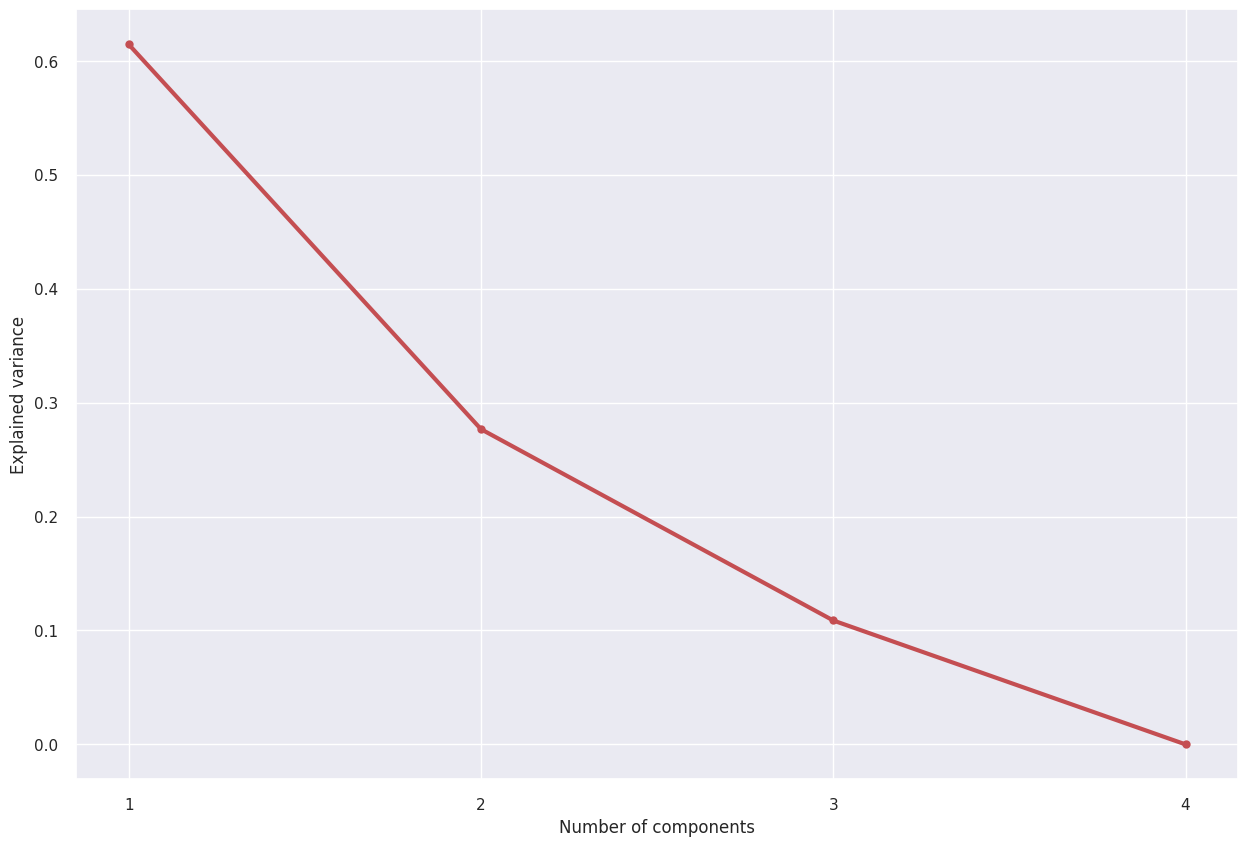

In [48]:
Lambda = pca.explained_variance_ 

x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Text(0, 0.5, 'Cumulative explained variance')

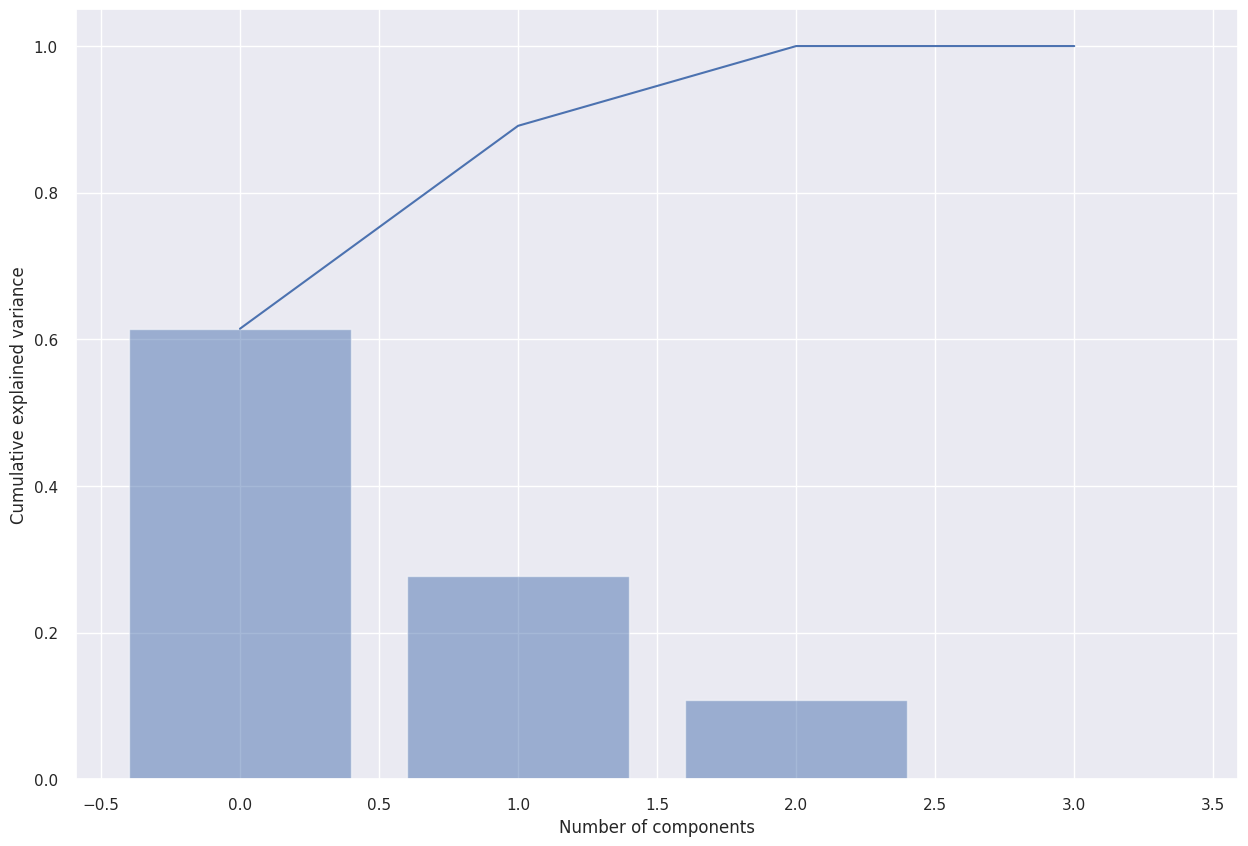

In [49]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [50]:
!pip3 install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from pca import pca
model = pca()
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [55]:
out['PC']

,PC1,PC2,PC3
0,9.751539,-0.699571,2.321055
1,1.065495,-1.438259,0.594378
2,1.782164,-1.262551,0.735883
3,2.756370,-1.051168,0.884758
4,4.198057,-0.627523,0.203672
...,...,...,...
528,-1.295883,1.477668,0.336356
529,-0.986443,1.534541,-0.230862
530,-0.623484,1.921237,-0.345975
531,-1.737318,3.240136,1.056951


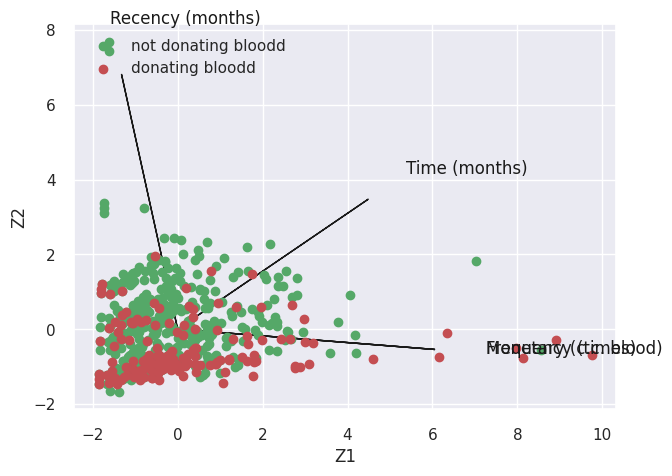

In [56]:
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Male,0], Z[idx_Male,1], c='g', label='not donating bloodd')
plt.scatter(Z[idx_Female,0], Z[idx_Female,1], c='r', label='donating bloodd')
plt.legend(loc='upper left')

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '3 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (61.4% expl.var)', ylabel='PC2 (27.6% expl.var)'>)

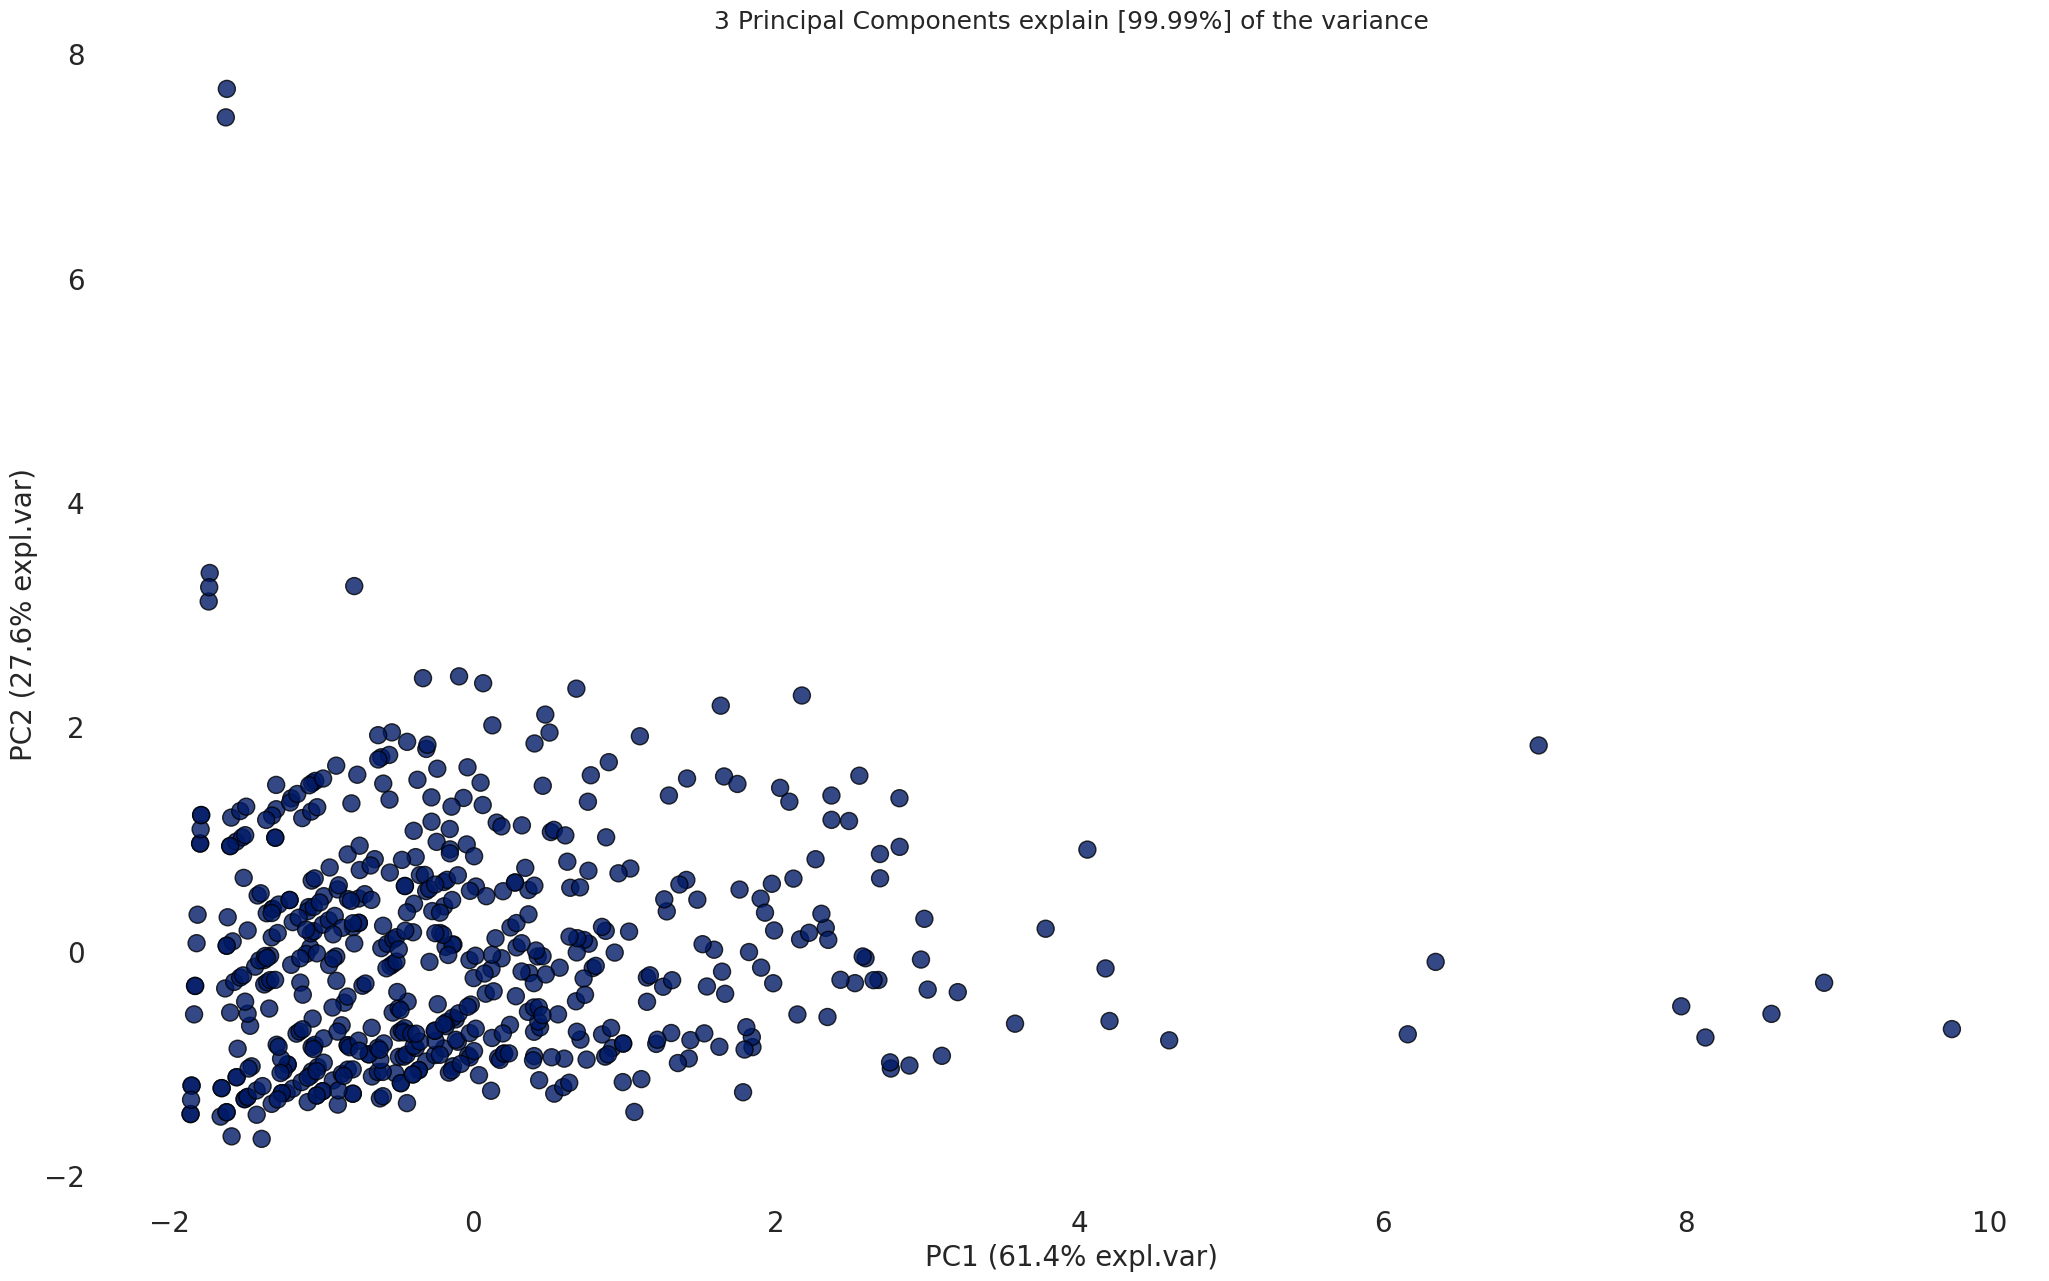

In [57]:
model.scatter(label=True, legend=False)

In [58]:
A = out['loadings'].T

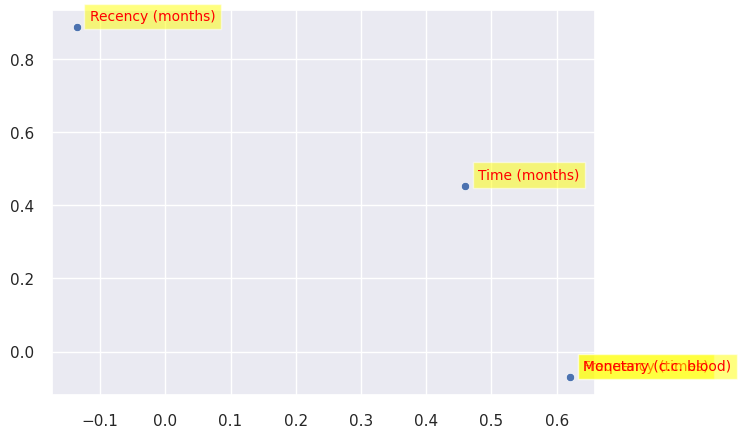

In [59]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('')
plt.ylabel('')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

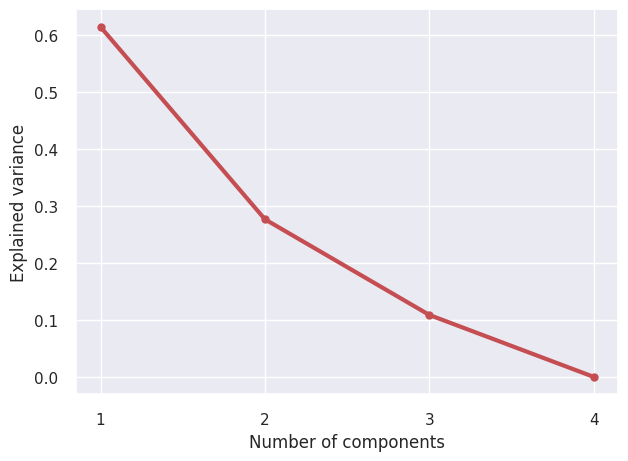

In [60]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

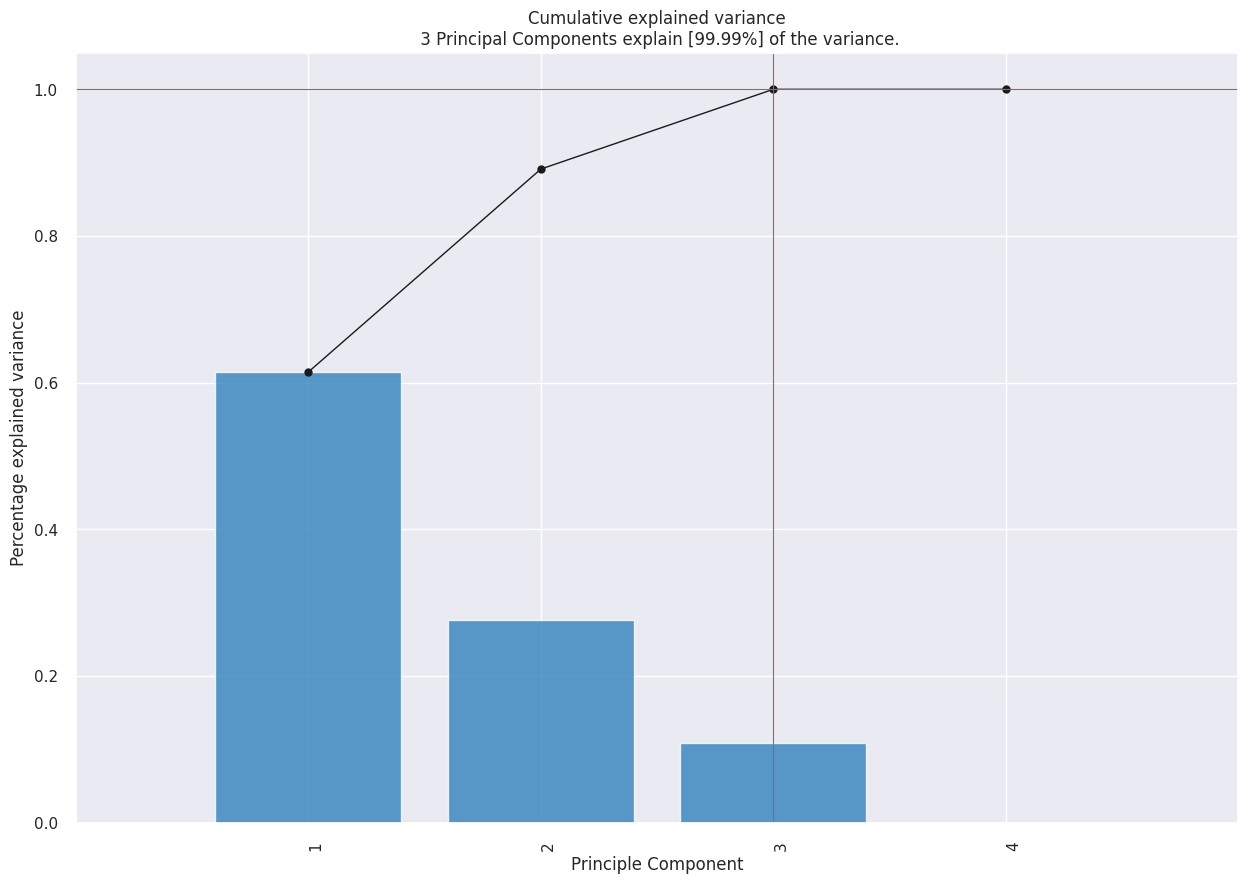

<Figure size 700x500 with 0 Axes>

In [61]:
model.plot();

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


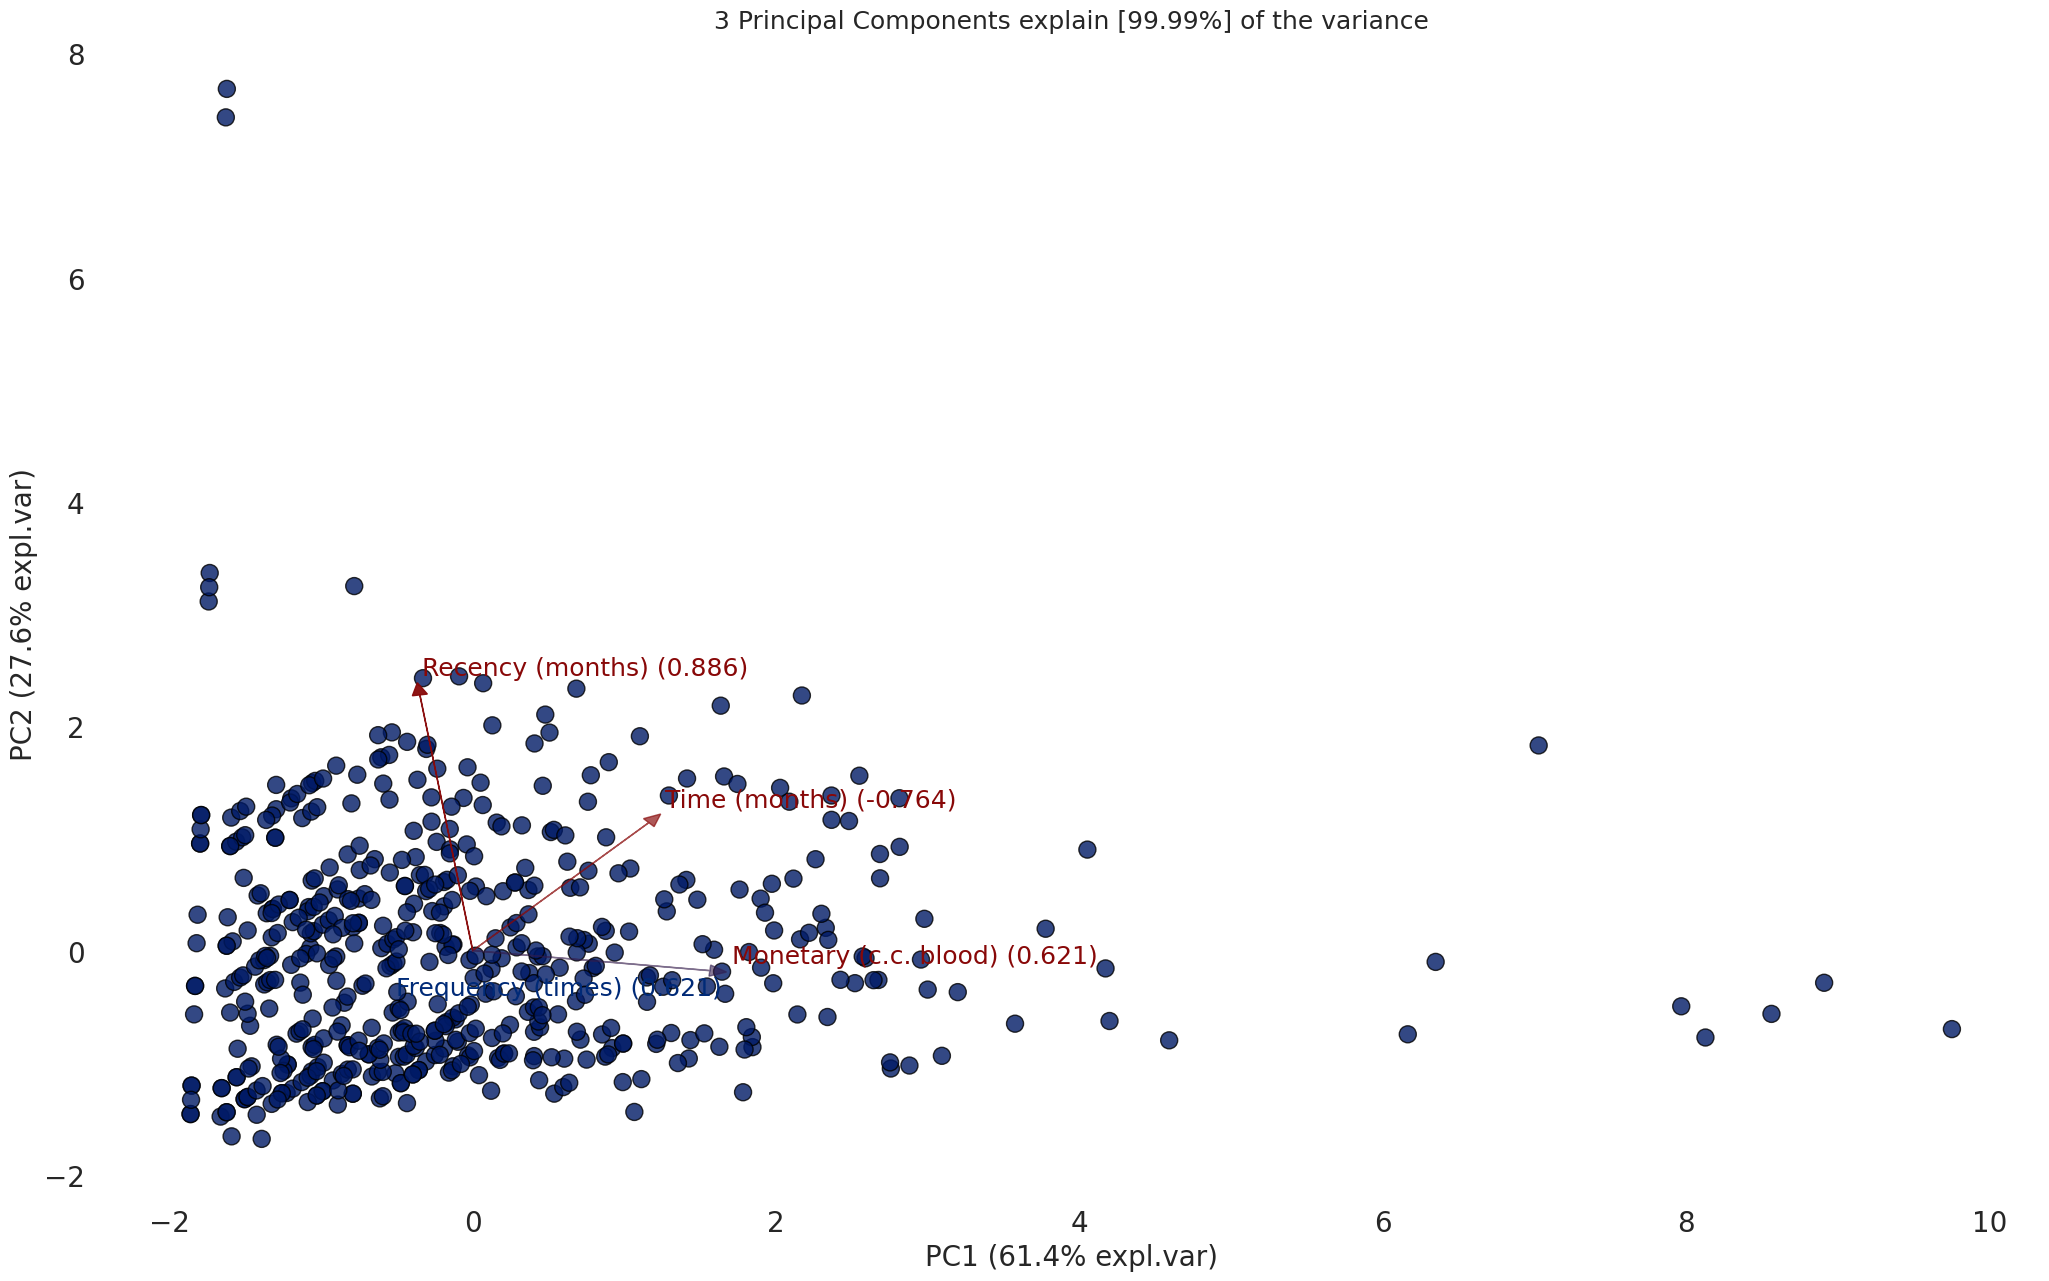

(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '3 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (61.4% expl.var)', ylabel='PC2 (27.6% expl.var)'>)

In [62]:
model.biplot(label=False, legend=False)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,5)

#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/shuvasha/stat/main/transfusion.csv')
df.head(25)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [16]:
from pycaret.classification import *
clf_pca = setup(data=df, target='whether he/she donated blood in March 2007', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,whether he/she donated blood in March 2007
2,Target type,Binary
3,Original data shape,"(748, 5)"
4,Transformed data shape,"(748, 4)"
5,Transformed train set shape,"(523, 4)"
6,Transformed test set shape,"(225, 4)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [17]:
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7745,0.7492,0.1603,0.5417,0.2443,0.1634,0.2030,0.2240
lda,Linear Discriminant Analysis,0.7745,0.7529,0.1442,0.5550,0.2229,0.1498,0.1933,0.1300
ridge,Ridge Classifier,0.7725,0.0000,0.0962,0.6083,0.1617,0.1089,0.1746,0.0940
rf,Random Forest Classifier,0.7652,0.6949,0.3154,0.5279,0.3835,0.2532,0.2696,0.5260
nb,Naive Bayes,0.7630,0.7198,0.1526,0.5188,0.2250,0.1344,0.1714,0.2400
dummy,Dummy Classifier,0.7630,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1260
ada,Ada Boost Classifier,0.7611,0.6929,0.2750,0.4990,0.3479,0.2188,0.2358,0.5800
gbc,Gradient Boosting Classifier,0.7556,0.7118,0.2506,0.5406,0.3242,0.1972,0.2279,0.3380
qda,Quadratic Discriminant Analysis,0.7553,0.7259,0.1929,0.4594,0.2630,0.1490,0.1704,0.2330
et,Extra Trees Classifier,0.7537,0.6583,0.2506,0.5292,0.3185,0.1916,0.2209,0.5780


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [18]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6981,0.7221,0.0769,0.2000,0.1111,-0.0291,-0.0340
1,0.7547,0.6808,0.1538,0.5000,0.2353,0.1355,0.1691
2,0.7925,0.6644,0.2308,0.7500,0.3529,0.2685,0.3352
3,0.7692,0.7125,0.1667,0.5000,0.2500,0.1522,0.1845
4,0.8077,0.7927,0.1667,1.0000,0.2857,0.2353,0.3651
5,0.7308,0.7500,0.0000,0.0000,0.0000,-0.0706,-0.1095
6,0.7692,0.8438,0.1667,0.5000,0.2500,0.1522,0.1845
7,0.8269,0.7750,0.3333,0.8000,0.4706,0.3874,0.4407
8,0.7308,0.7979,0.0000,0.0000,0.0000,-0.0706,-0.1095


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [20]:
tuned_best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

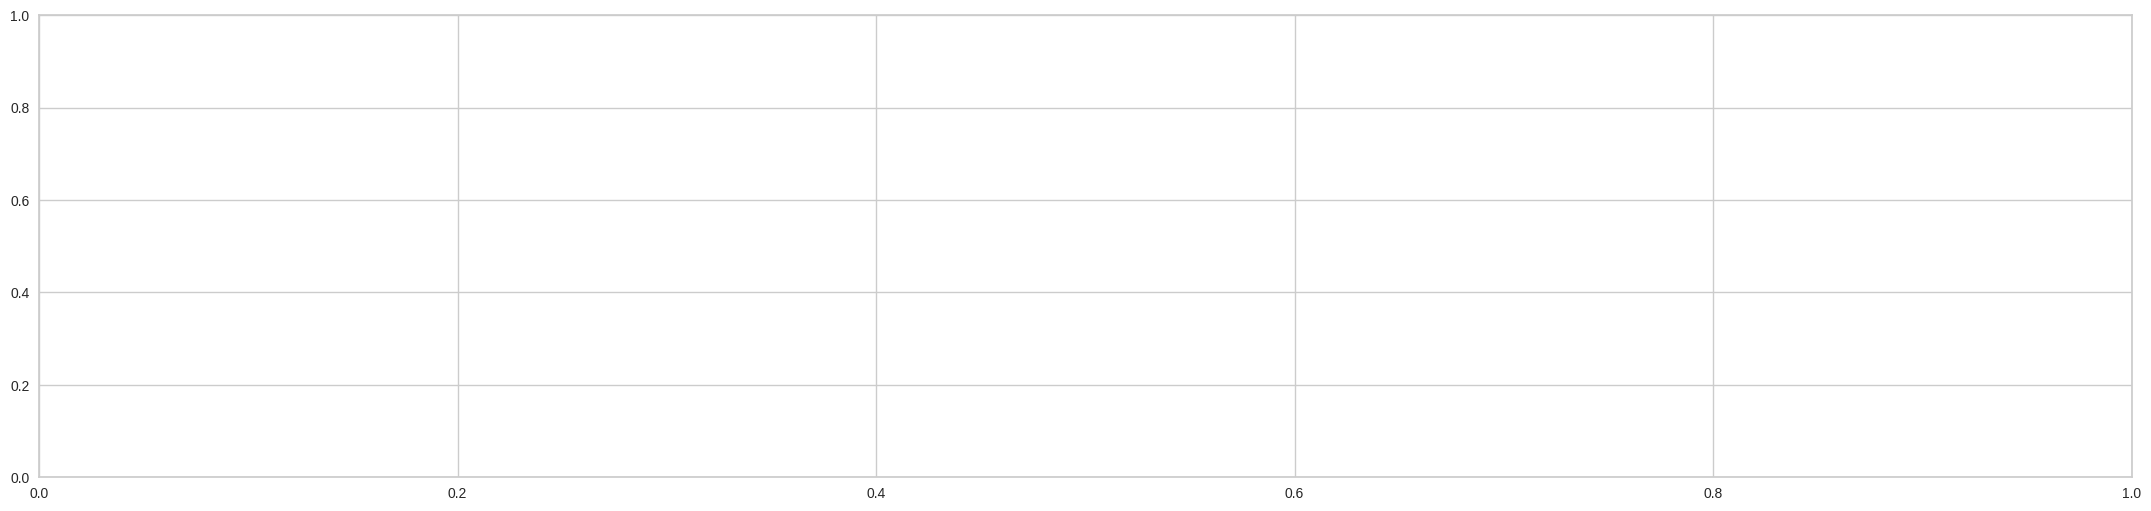

In [21]:
evaluate_model(tuned_best_model_pca)

In [22]:
!pip install pycaret[analysis]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7170,0.5548,0.3077,0.4000,0.3478,0.1710,0.1734
1,0.6226,0.6385,0.2308,0.2308,0.2308,-0.0192,-0.0192
2,0.7358,0.6308,0.2308,0.4286,0.3000,0.1549,0.1662
3,0.7500,0.6552,0.1667,0.4000,0.2353,0.1152,0.1310
4,0.8269,0.7406,0.5000,0.6667,0.5714,0.4658,0.4733
5,0.7692,0.7344,0.0833,0.5000,0.1429,0.0824,0.1278
6,0.8077,0.7115,0.4167,0.6250,0.5000,0.3868,0.3990
7,0.7500,0.7167,0.3333,0.4444,0.3810,0.2283,0.2320
8,0.8462,0.7844,0.5000,0.7500,0.6000,0.5094,0.5255


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7358,0.6846,0.2308,0.4286,0.3000,0.1549,0.1662
1,0.7358,0.6875,0.1538,0.4000,0.2222,0.0995,0.1161
2,0.7736,0.6096,0.2308,0.6000,0.3333,0.2282,0.2661
3,0.7692,0.6198,0.2500,0.5000,0.3333,0.2121,0.2308
4,0.8654,0.7396,0.4167,1.0000,0.5882,0.5236,0.5955
5,0.7500,0.6812,0.0833,0.3333,0.1333,0.0452,0.0602
6,0.7885,0.7677,0.2500,0.6000,0.3529,0.2513,0.2858
7,0.6538,0.6156,0.4167,0.3125,0.3571,0.1269,0.1293
8,0.8269,0.7677,0.3333,0.8000,0.4706,0.3874,0.4407


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


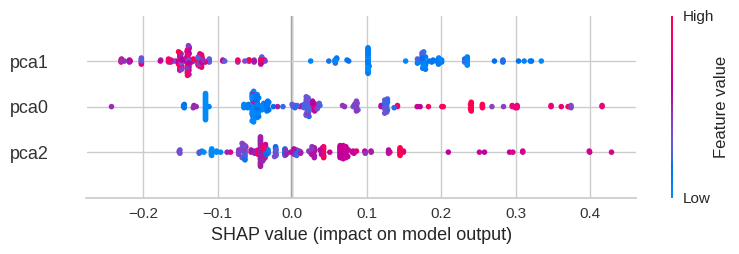

In [25]:
interpret_model(tuned_rf_pca, plot='summary')

In [26]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

In [27]:
interpret_model(tuned_rf_pca, plot='reason')